In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [20]:
confusion = pd.read_csv("confusionNorm_10_iterations0.01_learningRate.txt", sep=";", header=None)
error = pd.read_csv("error_taxi.txt", sep=";", header=None)

#confusionHier = pd.read_csv("confusionHier_50_iterations0.01_learningRate.txt", sep=";", header=None)
#errorHier =  pd.read_csv("errorHier.txt",sep=";", header=None) 


In [3]:
confusion

,0,1,2,3,4,5,6,7,8
0,123.0,55.0,61.0,43.0,23.0,34.0,1.0,5.0,0.0
1,111.0,346.0,122.0,41.0,45.0,25.0,1.0,1.0,0.0
2,176.0,220.0,488.0,54.0,37.0,27.0,3.0,16.0,1.0
3,13.0,7.0,9.0,278.0,130.0,30.0,0.0,7.0,2.0
4,7.0,6.0,4.0,80.0,181.0,20.0,1.0,1.0,5.0
5,53.0,57.0,25.0,444.0,215.0,766.0,7.0,39.0,8.0
6,8.0,3.0,10.0,26.0,23.0,11.0,34.0,46.0,29.0
7,21.0,5.0,12.0,214.0,147.0,59.0,25.0,236.0,12.0
8,14.0,11.0,24.0,37.0,38.0,50.0,68.0,74.0,296.0


In [21]:
confusion_np = np.array(confusion)
#confusionHier_np = np.array(confusionHier)

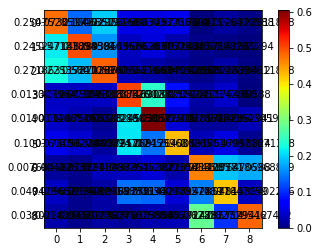

In [22]:
conf_arr = confusion_np
#conf_arr = confusionHier_np
norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr.shape

for x in range(width):
    for y in range(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

cb = fig.colorbar(res)
alphabet = '012345678'
plt.xticks(range(width), alphabet[:width])
plt.yticks(range(height), alphabet[:height])
plt.savefig('confusion_matrix.png', format='png')
plt.show()

In [15]:
def curves(arr1, arr2, title, lab1, lab2):
    #interval = range(len(arr2))
    plt.plot(range(len(arr1)), [arr1[i] for i in range(len(arr1))],color = "red", label = lab1)
    plt.plot(range(len(arr2)), [arr2[i] for i in range(len(arr2))],color = "blue", label = lab2)
    #plt.plot(range(len(arr3)), [arr3[i] for i in range(len(arr3))],color = "green", label = lab3)
    plt.title(title)
    plt.xlabel("epochs")
    plt.ylabel("error")
    plt.legend()
    plt.savefig('error.png', format='png')
    plt.show()

In [18]:
error_train = list(error.iloc[0,:])
error_test = list(error.iloc[1,:])

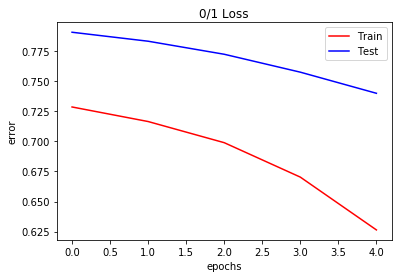

In [19]:
curves(error_train, error_test, "0/1 Loss" ,"Train" , "Test")

In [10]:
error_hier_train = list(errorHier.iloc[0,:])
error_hier_test =  list(errorHier.iloc[1,:])

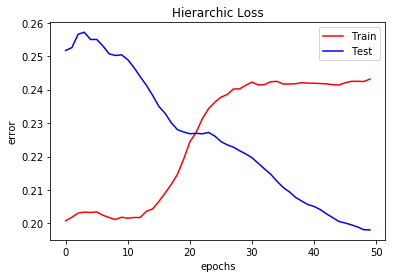

In [11]:
curves(error_hier_train, error_hier_test, "Hierarchic Loss" ,"Train" , "Test")